In [1]:
import pandas as pd
import numpy as np                                     # Matlab like syntax for linear algebra and functions
import seaborn as sns                                  # Make the plots nicer to look at
import matplotlib.pyplot as plt                        # Plots and figures like you know them from Matlab
from iminuit import Minuit                             # The actual fitting tool, better than scipy's
import sys                                             # Modules to see files and folders in directories
from scipy.signal import find_peaks
import glob
import os

In [2]:
sys.path.append('/Users/malthenielsen/Documents/GitHub/AppStat2021/External_Functions')
from ExternalFunctions import UnbinnedLH, BinnedLH, Chi2Regression
from ExternalFunctions import nice_string_output, add_text_to_ax # useful functions to print fit results on figure

# In case you want to load function from a jupyter notebook from the current working directory, you can use the function below:
#   from ipynb.fs.full.ExternalFunctions import nice_string_output, add_text_to_ax # useful functions to print fit results on figure

In [34]:
def line(x,a,b):
    """Just a line"""
    return a*x+b

def gauss_pdf(x, mu, sigma) :
    """Gaussian"""
    return 1.0 / np.sqrt(2*np.pi) / sigma * np.exp( -0.5 * (x-mu)**2 / sigma**2)

def exp_pdf(x, a, V0, s0):
    """Exponential"""
    return 0.5 * a * x**2 + V0 * x + s0

In [4]:
def weighted_average(distribution, weights):
    return round(sum([distribution[i]*weights[i] for i in range(len(distribution))])/sum(weights),2)

In [5]:
def cal_avg_error(df):
    list = []
    df = df.append(pd.Series(0, index=df.columns), ignore_index=True) #adds row

    for i in range(int(len(df.T)/2)):
        # Weighted Average
        df.iloc[-1, i*2] = weighted_average(df.iloc[:, i*2], df.iloc[:, i*2+1])
    
        #Error (needs updating)
        df.iloc[-1, i*2+1] = df.iloc[:, i*2+1].mean()
    
    return df

In [6]:
def peak_finder(df, offset=0, line=1, peakN=0, plot=True, zoom=False):
    
    peaks, _ = find_peaks(df.iloc[:,1], height=line)
    df.iloc[:,0] -= df.iloc[:,0][peaks[0]] - offset
    
    if plot == True:
        plt.plot(df.iloc[:,0], df.iloc[:,1])
        plt.plot(df.iloc[:,0][peaks], df.iloc[:,1][peaks], "x")
        plt.plot(df.iloc[:,0], np.ones_like(df.iloc[:,1])*line, "--", color="gray")

        plt.xlim([-0.10, df.iloc[:,0][peaks[-1]] + 0.10])
    
    if zoom == True:
        plt.xlim([df.iloc[:,0][peaks[peakN]]-0.01, df.iloc[:,0][peaks[peakN]] + 0.01])
        plt.ylim([df.iloc[:,1][peaks[peakN]]-0.0001, df.iloc[:,1][peaks[peakN]] + 0.0001])
    
    if plot == True:
        plt.show()
        
    return df.iloc[:,0][peaks]

In [7]:
Rol_main = pd.read_csv (r'/Users/malthenielsen/Desktop/Forsøg 1/CSV/Rolling_ball_main.csv', sep=";")
Rol_left = pd.read_csv (r'/Users/malthenielsen/Desktop/Forsøg 1/CSV/Rolling_ball_left.csv', sep=";")
Rol_right = pd.read_csv (r'/Users/malthenielsen/Desktop/Forsøg 1/CSV/Rolling_ball_right.csv', sep=";")

In [8]:
Rol_main

,Slit_size_mm,Slit_size_mm_error,Stor_kulge_mm,Stor_kulge_mm_error,Lille_kulge_mm,Lille_kulge_mm_error,Sensor1_mm,Sensor1_mm_error,Sensor2_mm,Sensor2_mm_error,...,Sensor4_mm,Sensor4_mm_error,Sensor5_mm,Sensor5_mm_error,Længde_mm,Længde_mm_error,Højde_mm,Højde_mm_error,Lille_højde_mm,Lille_højde_mm_error
0,5.8,0.04,12.81,0.05,11.10,0.05,797.0,0.7,631.5,0.7,...,290.5,0.7,113.0,0.7,888.88,0.2,241.2,0.2,26.40,0.03
1,6.0,0.02,12.76,0.04,11.02,0.04,797.0,0.5,632.0,0.5,...,291.5,0.5,113.0,0.5,889.00,0.3,241.1,0.3,26.68,0.02
2,5.8,0.01,12.71,0.01,11.01,0.01,797.2,0.3,631.8,0.3,...,290.4,0.3,113.8,0.3,888.90,0.2,241.1,0.2,26.52,0.02
3,6.0,0.05,12.79,0.05,11.03,0.05,797.2,0.4,631.8,0.4,...,290.5,0.4,113.0,0.4,889.10,0.3,240.5,0.4,26.48,0.05


In [9]:
path = r'/Users/malthenielsen/Desktop/Forsøg 1/Data/Rolling_ball/csv/' # use your path
names_list = np.sort(os.listdir(path))

for i in range(len(names_list)):
    names_list[i] = names_list[i].replace('.csv', '')

for i in names_list: 
    locals()[i] = pd.read_csv((path + i + '.csv'), index_col=None, sep=',', skiprows=14)

print(names_list)

['Slope_1_1_stor_venstre' 'Slope_1_2_stor_venstre'
 'Slope_1_3_stor_venstre' 'Slope_1_4_stor_venstre'
 'Slope_2_1_lille_venstre' 'Slope_2_2_lille_venstre'
 'Slope_2_3_lille_venstre' 'Slope_2_4_lille_venstre'
 'Slope_3_1_stor_højdre' 'Slope_3_2_stor_højdre' 'Slope_3_3_stor_højdre'
 'Slope_3_4_stor_højdre' 'Slope_4_1_lille_højdre' 'Slope_4_2_lille_højdre'
 'Slope_4_3_lille_højdre' 'Slope_4_4_lille_højdre'
 'Slope_5_1_lille_freefall' 'Slope_5_2_lille_freefall']


In [26]:
for i in names_list:
    locals()[i+'_peak_time'] = peak_finder(locals()[i], offset = 0, plot=False)
    print([i+'_peak_time'])

['Slope_1_1_stor_venstre_peak_time']
['Slope_1_2_stor_venstre_peak_time']
['Slope_1_3_stor_venstre_peak_time']
['Slope_1_4_stor_venstre_peak_time']
['Slope_2_1_lille_venstre_peak_time']
['Slope_2_2_lille_venstre_peak_time']
['Slope_2_3_lille_venstre_peak_time']
['Slope_2_4_lille_venstre_peak_time']
['Slope_3_1_stor_højdre_peak_time']
['Slope_3_2_stor_højdre_peak_time']
['Slope_3_3_stor_højdre_peak_time']
['Slope_3_4_stor_højdre_peak_time']
['Slope_4_1_lille_højdre_peak_time']
['Slope_4_2_lille_højdre_peak_time']
['Slope_4_3_lille_højdre_peak_time']
['Slope_4_4_lille_højdre_peak_time']
['Slope_5_1_lille_freefall_peak_time']
['Slope_5_2_lille_freefall_peak_time']


In [11]:
Slope_1_1_stor_venstre_peak_time

13025    0.00000
24699    0.23348
33516    0.40982
40240    0.54430
46528    0.67006
Name: Time (s), dtype: float64

In [12]:
cal_avg_error(Rol_left)[-1:]

,Vinkel_left_front_grader,Vinkel_left_front_grader_error,Vinkel_left_bagside_grader,Vinkel_left_bagside_grader_error
4,76.8,0.24,76.28,0.24


In [13]:
cal_avg_error(Rol_right)[-1:]

,Vinkel_right_front_grader,Vinkel_right_front_grader_error,Vinkel_right_bagside_grader,Vinkel_right_bagside_grader_error
4,75.9,0.16,75.74,0.18


In [14]:
cal_avg_error(Rol_main)[-1:]

,Slit_size_mm,Slit_size_mm_error,Stor_kulge_mm,Stor_kulge_mm_error,Lille_kulge_mm,Lille_kulge_mm_error,Sensor1_mm,Sensor1_mm_error,Sensor2_mm,Sensor2_mm_error,...,Sensor4_mm,Sensor4_mm_error,Sensor5_mm,Sensor5_mm_error,Længde_mm,Længde_mm_error,Højde_mm,Højde_mm_error,Lille_højde_mm,Lille_højde_mm_error
4,5.92,0.024,12.78,0.03,11.05,0.03,797.07,0.38,631.74,0.38,...,290.75,0.38,113.13,0.38,888.99,0.2,240.9,0.22,26.5,0.024


In [83]:
offset = 0

Sensor_list = []
Rol_main_updated = cal_avg_error(Rol_main)
copy = Rol_main_updated.iloc[-1:,6].copy()
for i in range(5):
    x = abs(Rol_main_updated.iloc[-1:,6+2*i]- copy)

    Rol_main_updated.iloc[-1:,6+2*i] = x + offset
    Sensor_list.append(float(x))
    
Rol_main_updated

,Slit_size_mm,Slit_size_mm_error,Stor_kulge_mm,Stor_kulge_mm_error,Lille_kulge_mm,Lille_kulge_mm_error,Sensor1_mm,Sensor1_mm_error,Sensor2_mm,Sensor2_mm_error,...,Sensor4_mm,Sensor4_mm_error,Sensor5_mm,Sensor5_mm_error,Længde_mm,Længde_mm_error,Højde_mm,Højde_mm_error,Lille_højde_mm,Lille_højde_mm_error
0,5.80,0.040,12.81,0.05,11.10,0.05,797.0,0.70,631.50,0.70,...,290.50,0.70,113.00,0.70,888.88,0.2,241.2,0.20,26.40,0.030
1,6.00,0.020,12.76,0.04,11.02,0.04,797.0,0.50,632.00,0.50,...,291.50,0.50,113.00,0.50,889.00,0.3,241.1,0.30,26.68,0.020
2,5.80,0.010,12.71,0.01,11.01,0.01,797.2,0.30,631.80,0.30,...,290.40,0.30,113.80,0.30,888.90,0.2,241.1,0.20,26.52,0.020
3,6.00,0.050,12.79,0.05,11.03,0.05,797.2,0.40,631.80,0.40,...,290.50,0.40,113.00,0.40,889.10,0.3,240.5,0.40,26.48,0.050
4,5.92,0.024,12.78,0.03,11.05,0.03,0.0,0.38,165.33,0.38,...,506.32,0.38,683.94,0.38,888.99,0.2,240.9,0.22,26.50,0.024


In [85]:
Sensor_list

[0.0, 165.33000000000004, 342.44000000000005, 506.32000000000005, 683.94]

In [86]:
Minuit.print_level = 100

def parabel(x,a,b,c):
    return 0.5*a*x**2+b*x+c

x, y = Slope_1_1_stor_venstre_peak_time, Sensor_list
print(y)
chi2fit = Chi2Regression(parabel, x, y)
    
m = Minuit(chi2fit, a=0, b=0, c=0)
m.errordef = 1.0     # This is the definition for ChiSqaure fits
m.migrad()

[0.0, 165.33000000000004, 342.44000000000005, 506.32000000000005, 683.94]


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.2446                     │              Nfcn = 62               │
│ EDM = 2.66e-16 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │  1.428e3  │  0.019e3  │            │            │         │         │       │
│ 1 │ b    │    542    │     7     │            │            │         │         │       │
│ 2 │ c    │    -0     │     1     │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │     a     b     c │
├───┼───────────────────┤
│ a │   361  -120  9.55 │
│ b │  -120  43.3 -4.51 │
│ c │  9.55 -4.51  0.95 │
└───┴───────────────────┘

[1428.009287039687, 542.1929229768526, -0.025655935270174623]


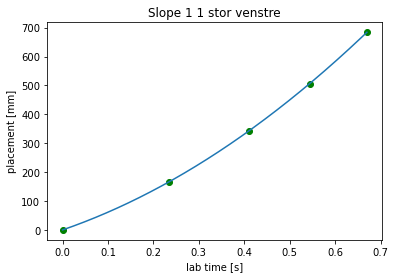

[1431.8807876384901, 540.7365439501613, -0.016424724941288105]


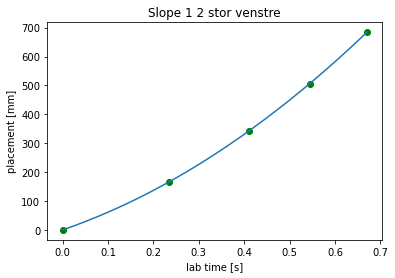

[1430.9987461673823, 541.4737042524007, -0.011245396808744701]


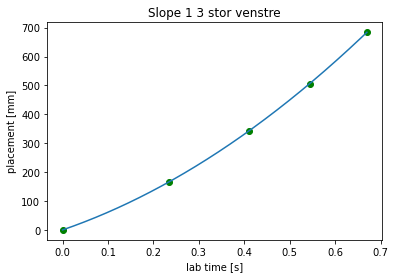

[1429.6823892356506, 538.2779084087081, -0.004550888082009763]


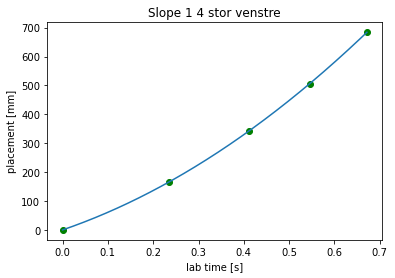

[1380.056944879457, 525.0353768774233, -0.018929162723948068]


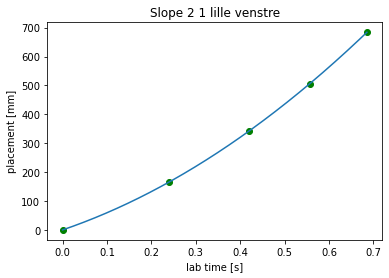

[1365.9489023864621, 521.6017289212217, 0.0630608363050893]


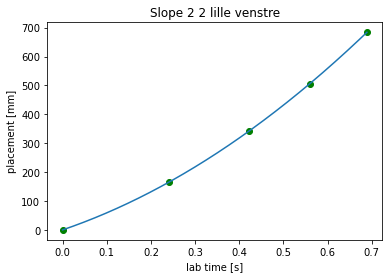

[1373.4770261502429, 534.865343882549, -0.110285953784377]


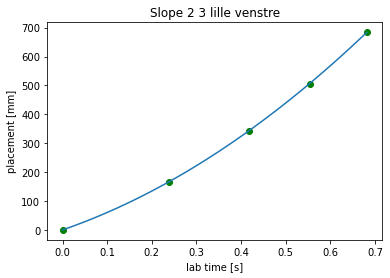

[1383.7311503735086, 531.9347708681795, -0.03785386229936627]


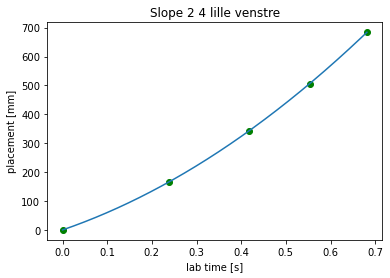

[1507.9577938449638, 554.3394569756051, 0.002129352759327574]


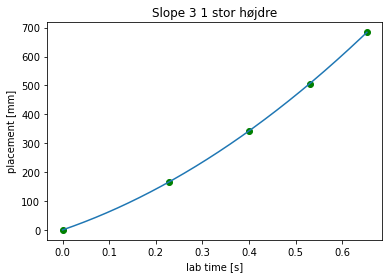

[1507.8929962704242, 553.963819322948, 0.025309330504668992]


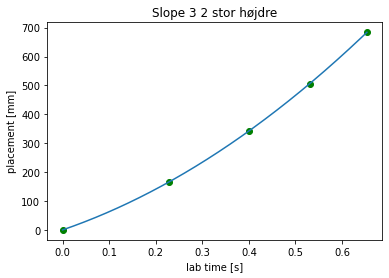

[1511.5655038481261, 553.9607529671606, 0.020115850617431263]


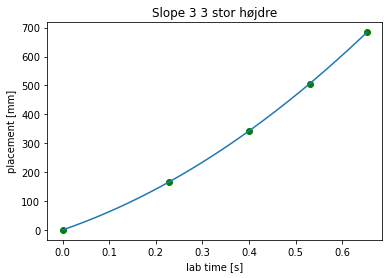

[1515.3887258051873, 551.4809169854511, 0.0011376873339106197]


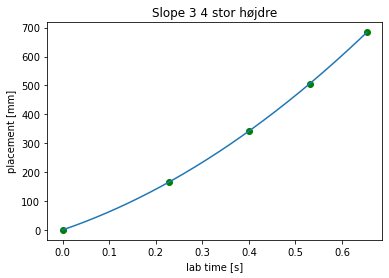

[1462.905699088431, 541.7015534167499, -0.02103534272272789]


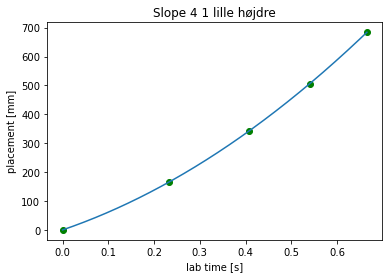

[1464.6956816554411, 545.2686264573011, -0.004563165008288905]


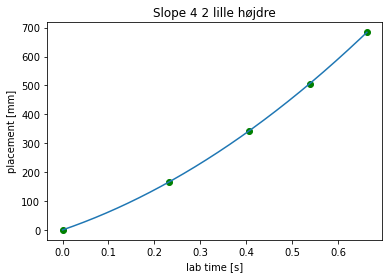

[1462.0774971138092, 547.1790834266752, -0.03529875846453834]


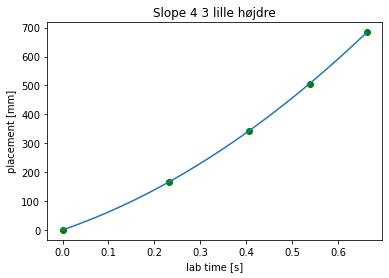

[1464.6087572618437, 541.1026254622075, -0.03978033813889681]


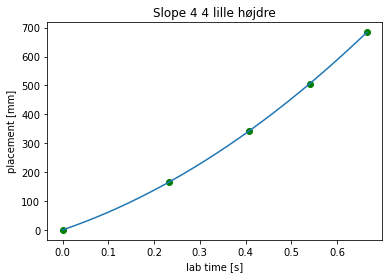

[9682.994707299791, 1135.0829480078237, -0.014152663848858715]


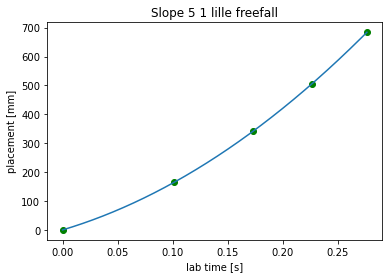

[9653.191104107638, 1007.7692536250527, -0.013533010271034929]


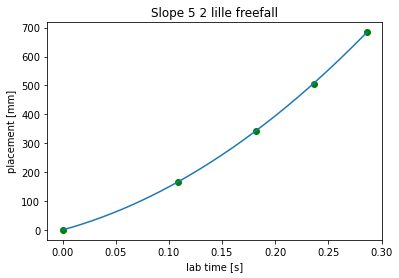

In [89]:
Minuit.print_level = 1

for i in names_list:
    Minuit.print_level += 1
    
    x, y = locals()[i+'_peak_time'], Sensor_list
    x_axis = np.linspace(min(x), max(x), 1000)
    
    
    #ullhfit = UnbinnedLH(exp_pdf, x, bound=(min(x), max(x)), extended=True)
    #minuit_ullh = Minuit(ullhfit, a=5000, V0=100)
    #minuit_ullh.errordef = 0.5     # Value for likelihood fits
    #minuit_ullh.migrad()           # Perform the actual fit
    
    chi2fit = Chi2Regression(exp_pdf, x, y)
    
    minuit_chi2 = Minuit(chi2fit, a=5, V0=1, s0=0)
    minuit_chi2.errordef = 1.0     # This is the definition for ChiSqaure fits
    minuit_chi2.migrad()
    

    
    print(minuit_chi2.values[:])
    
    fig = plt.figure()
    
    ax = fig.add_subplot()
    ax.set_xlabel('lab time [s]')
    ax.set_ylabel('placement [mm]')
    ax.set_title(f'{i}'.replace('_',' '))
    
    plt.scatter(x, y, color='g')
    ax.plot(x_axis, exp_pdf(x_axis, *minuit_chi2.values[:]), '-', label='') 
    
    plt.show()

In [18]:
sintheat = H/np.sqrt(L**2 + H**2)

NameError: name 'H' is not defined

In [ ]:
np.arcsin(sintheat)